## Assignment 8

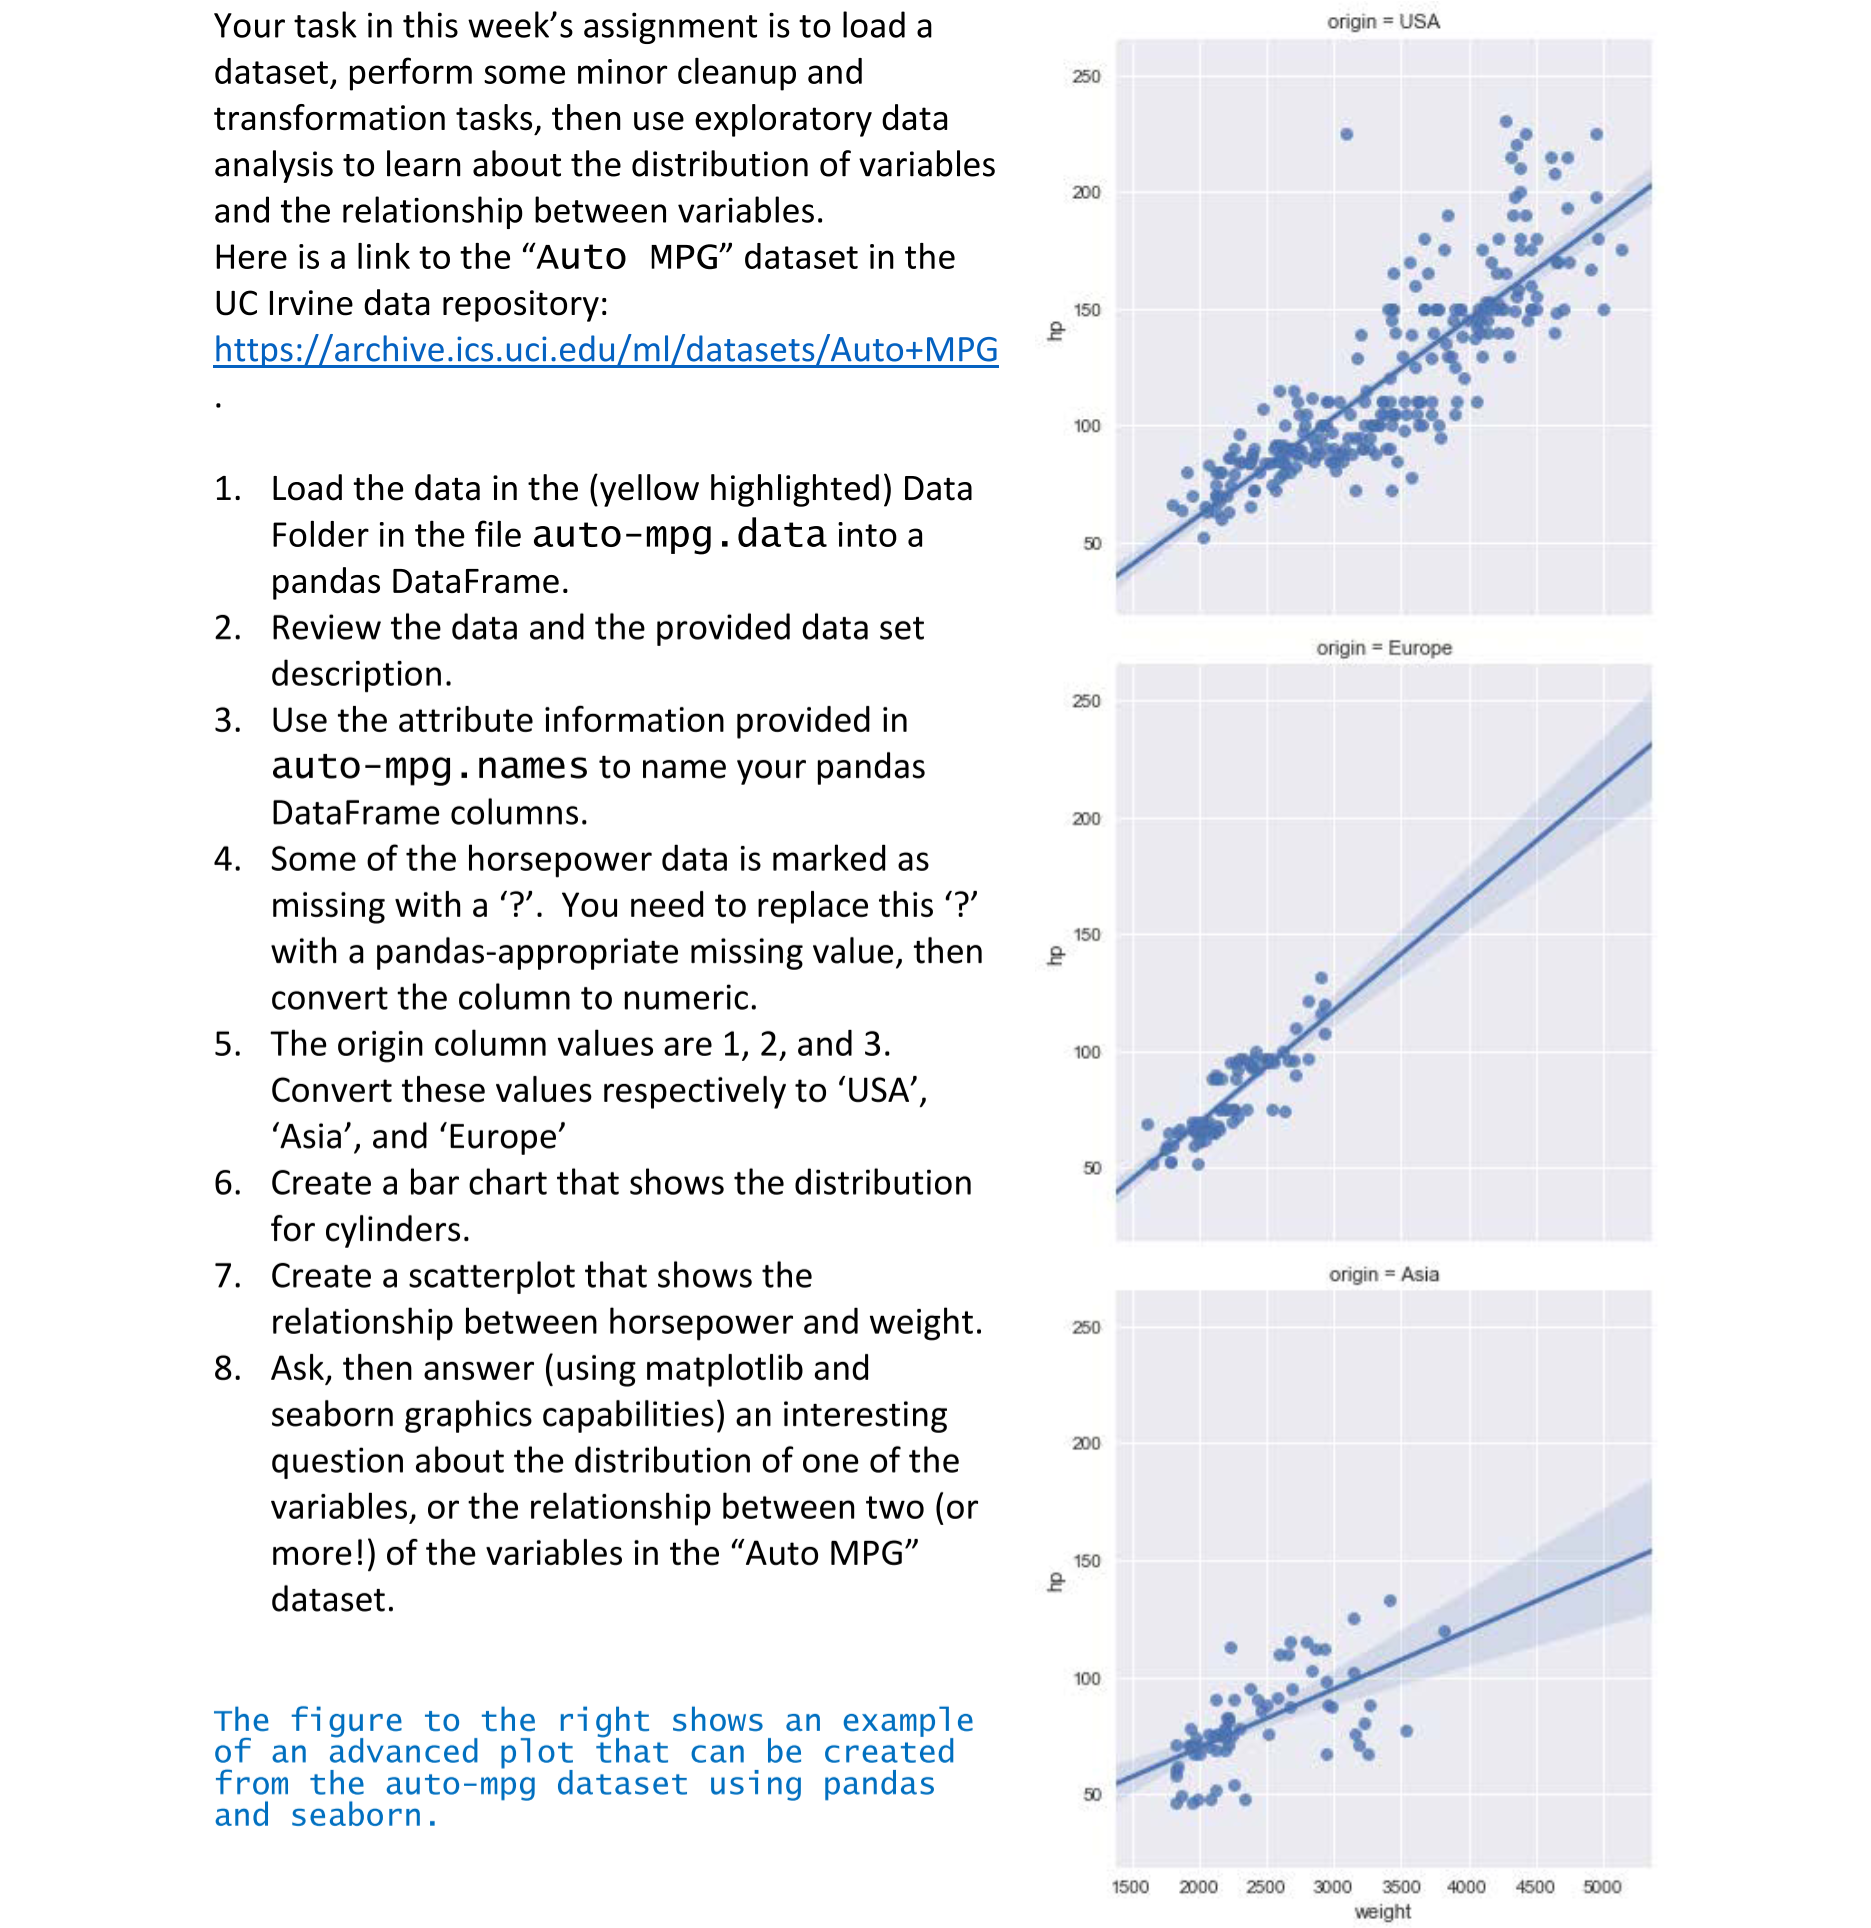


In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline

### 1. Load the data in the (yellow highlighted) Data Folder in the file auto-mpg.data into a pandas DataFrame.
### 2. Review the data and the provided data set description.
### 3. Use the attribute information provided in auto-mpg.names to name your pandas DataFrame columns.

In [2]:
auto_mpg = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data', delim_whitespace = True, names = ['mpg',
'cylinders', 'displacement','horsepower', 'weight', 'acceleration', 'model_year', 'origin', 'car_name'])
auto_mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


### 4. Some of the horsepower data is marked as missing with a ‘?’. You need to replace this ‘?’ with a pandas-appropriate missing value, then convert the column to numeric.

In [3]:
autocopy = auto_mpg.copy()
autocopy.loc[autocopy.horsepower == '?']

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
32,25.0,4,98.0,?,2046.0,19.0,71,1,ford pinto
126,21.0,6,200.0,?,2875.0,17.0,74,1,ford maverick
330,40.9,4,85.0,?,1835.0,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,?,2905.0,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,?,2320.0,15.8,81,2,renault 18i
374,23.0,4,151.0,?,3035.0,20.5,82,1,amc concord dl


In [4]:
autocopy.horsepower.replace('?', np.NAN, inplace = True)
autocopy.horsepower = pd.to_numeric(autocopy.horsepower)
autocopy.loc[autocopy.horsepower.isnull()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
32,25.0,4,98.0,NaN,2046.0,19.0,71,1,ford pinto
126,21.0,6,200.0,NaN,2875.0,17.0,74,1,ford maverick
330,40.9,4,85.0,NaN,1835.0,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,NaN,2905.0,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,NaN,2320.0,15.8,81,2,renault 18i
374,23.0,4,151.0,NaN,3035.0,20.5,82,1,amc concord dl


In [5]:
autocopy.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight          float64
acceleration    float64
model_year        int64
origin            int64
car_name         object
dtype: object

### 5. The origin column values are 1, 2, and 3. Convert these values respectively to ‘USA’, ‘Asia’, and ‘Europe’

In [6]:
autocopy = autocopy.replace({'origin' : { 1:'USA', 2:'Europe', 3:'Asia' }})
autocopy

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,USA,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,USA,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,USA,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,USA,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,USA,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,USA,ford mustang gl
394,44.0,4,97.0,52.0,2130.0,24.6,82,Europe,vw pickup
395,32.0,4,135.0,84.0,2295.0,11.6,82,USA,dodge rampage
396,28.0,4,120.0,79.0,2625.0,18.6,82,USA,ford ranger


### 6. Create a bar chart that shows the distribution for cylinders.

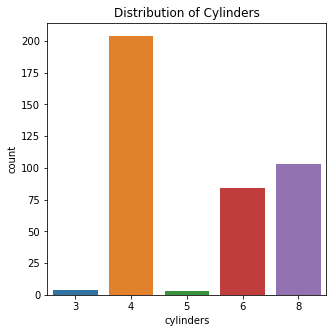

In [7]:
plt.figure(figsize = (5,5))
cylinder_dist = sns.countplot('cylinders', data= autocopy).set(title = 'Distribution of Cylinders')

### 7. Create a scatterplot that shows the relationship between horsepower and weight.

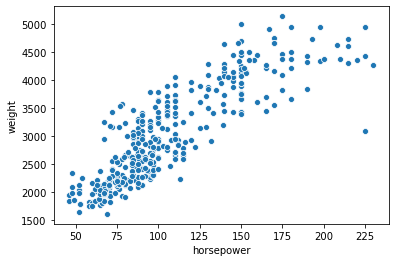

In [8]:
sns.scatterplot(x= 'horsepower', y = 'weight', data = autocopy)

### 8. Ask, then answer (using matplotlib and seaborn graphics capabilities) an interesting question about the distribution of one of the variables, or the relationship between two (or more!) of the variables in the “Auto MPG” dataset.

### Throughout the years, which region manufactured cars with the highest mpg? What are the trends for mpg throughout the years?


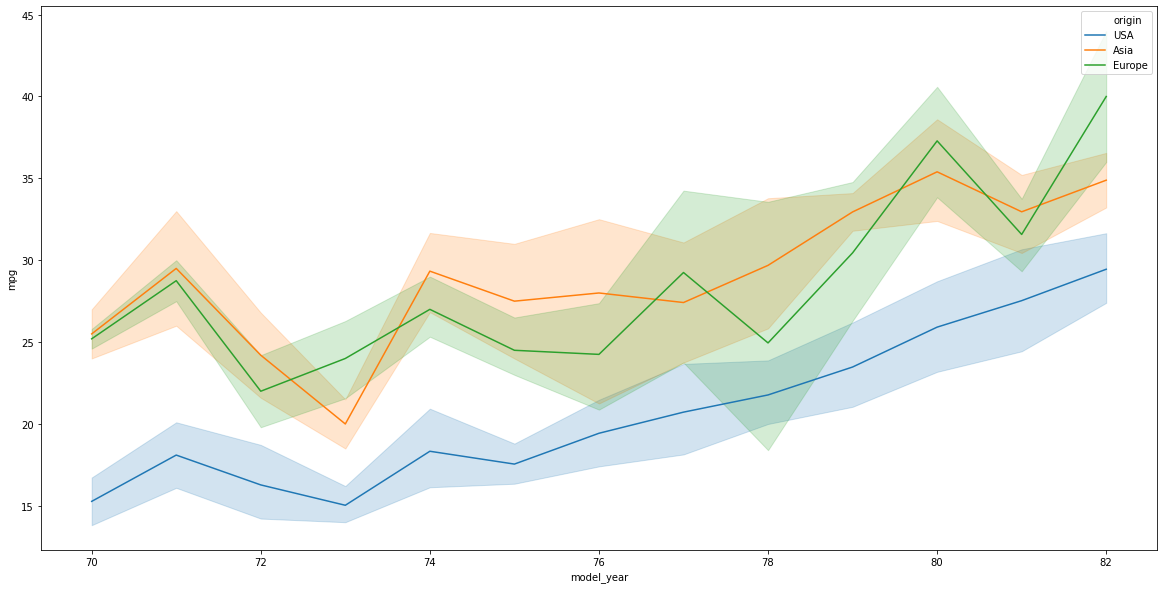

In [9]:
plt.figure(figsize = (20,10))
origin_comparison = sns.lineplot(x = 'model_year', y = 'mpg', hue = 'origin', data = autocopy)

__Looking at the graph, Europe manufactured cars with the highest mpg in 1982. There were many years in which Asia manufactured cars with higher mpg than Europe. The USA consistently manufactured cars with the lowest mpg but there seems to be a positive correlation between model year and mpg since 1975. It doesn't seem like there is a correlation for Europe and Asia between these two variables.__
